# Chapter 2: Classification

## MNIST

In [11]:
import numpy as np
from sklearn.datasets import fetch_openml

In [12]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
X, y = mnist["data"], mnist["target"]

In [14]:
X.shape, y.shape # 784 => 28x28

((70000, 784), (70000,))

In [15]:
import matplotlib.pyplot as plt

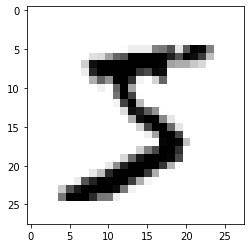

In [16]:
some_digit_image = X[0].reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.show()

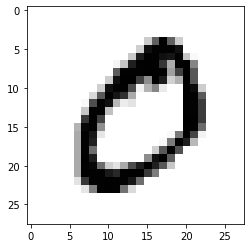

In [27]:
some_digit_image_2 = X[1].reshape(28, 28)
plt.imshow(some_digit_image_2, cmap="binary")
plt.show()

In [17]:
y[0]

'5'

In [18]:
y = y.astype(np.uint8)

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training Binary classifier

In [21]:
# Number 5 detector
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.score(X_train, y_train_5)

0.9522666666666667

In [25]:
sgd_clf.predict([X[0]])

array([ True])

In [30]:
sgd_clf.predict([X[1]])

array([False])

### Measuring accuracy

In [32]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [33]:
np.zeros(2)

array([0., 0.])

In [39]:
np.zeros((len([1,2]), 1), dtype=bool)

array([[False],
       [False]])

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_5_pred)

# Row: Actual Class [0, 1]
# Column: Predicted Class [0,
#                          1]

array([[53892,   687],
       [ 1891,  3530]])

In [42]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

### Precision and Recall
**Precision:** accuracy of positive predictions

**precision = TP / (TP + FP)**

**Recall:** sensitivity or true positive rate. Ration of positive instances that are correctly detected by the classifier

**recall = TP / (TP + FN)**

**F1:** harmonic mean of precision and recall. Harmonic mean gives more weight to low values, as the result, classifier will only get high f1 score if both recall and precision are high

In [45]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_5_pred), recall_score(y_train_5, y_train_5_pred)

# Our classifier is correct only 83.7% of the time.
# Moreover, it only detects 65.1% of 5s

(0.8370879772350012, 0.6511713705958311)

In [46]:
from  sklearn.metrics import f1_score

f1_score(y_train_5, y_train_5_pred)

0.7325171197343846

In [82]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [93]:
len(y_train_5), len(y_scores)

(60000, 60000)

In [95]:
my_arr = [1, 2, 3, 4, 5]
my_arr[:-1]

[1, 2, 3, 4]

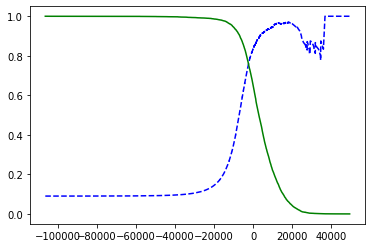

In [101]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

In [100]:
precisions.shape, recalls.shape, thresholds.shape

((59967,), (59967,), (59966,))

In [85]:
np.argmax(precisions >= 0.90)

57075

In [86]:
np.array([1,2,3,4,5]) >= 2

array([False,  True,  True,  True,  True])

In [87]:
np.argmax(np.array([1,2,3,4,5]) >= 2)

1

In [88]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [89]:
# instead of calling predict method, manually use our requirement threshold
y_train_5_pred_90 = (y_scores >= threshold_90_precision)

precision_score(y_train_5, y_train_5_pred_90), recall_score(y_train_5, y_train_5_pred_90)

(0.9000345901072293, 0.4799852425751706)

### ROC Curve

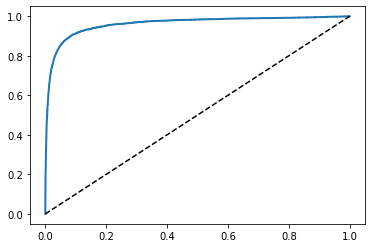

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.plot(fpr, tpr, linewidth=2, label='SGD')
plt.plot([0,1], [0,1], "k--") # dashed diagonal
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [103]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest.shape

(60000, 2)

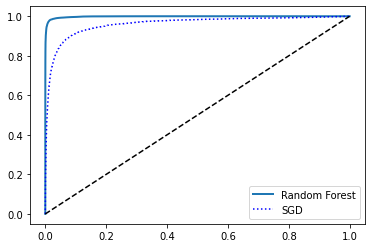

In [110]:
y_scores_forest = y_probas_forest[:, 1] # proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Random Forest")
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot([0,1], [0,1], "k--") # dashed diagonal
plt.legend(loc="lower right")
plt.show()

In [111]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classification

#### SVM

In [112]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train) # default uses OvO strategy for SVM
svm_clf.predict([X[0]]), svm_clf.predict([X[1]])

(array([5], dtype=uint8), array([0], dtype=uint8))

In [113]:
# OvO strategy, trained 45 binary classifiers, got their decision scores for the image
# selected the class that won the most duels

x_5_digit_scores = svm_clf.decision_function([X[0]])
x_5_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [114]:
np.argmax(x_5_digit_scores) # index of class

5

In [116]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [118]:
svm_clf.classes_[5] # the class

5

In [119]:
# using OvR strategy

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([X[0]])

KeyboardInterrupt: 

In [ ]:
len(ovr_clf.estimators_)

#### SGD

In [120]:
sgd_clf.fit(X_train, y_train) # OvR strategy under the hood
sgd_clf.predict([X[0]])

array([3], dtype=uint8)

In [121]:
sgd_clf.decision_function([X[0]])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [122]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [123]:
# increase accuracy by Standardization (zero mean, unit variance)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])